In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

#### Question 1

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of \$3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

a.	Think about what could be going wrong with our calculation. Think of a better way to evaluate this data.<br>
b.	What metric would you report for this dataset?<br>
c.	What is its value?

,order_amount
count,5000.000000
mean,3145.128000
std,41282.539349
min,90.000000
25%,163.000000
50%,284.000000
75%,390.000000
max,704000.000000


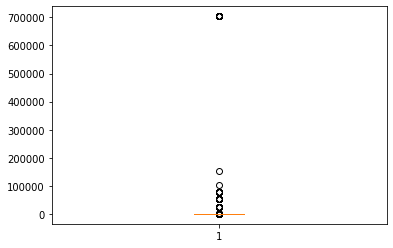

In [83]:
df = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set.csv")
display(df[['order_amount']].describe())
plt.boxplot(df[['order_amount']]);

A display of the different percentiles of order amounts shows a massive outlier, where an order amount equals \\$704,000. This is likely what's inflating the AOV to \\$3,145.13, as arithmetic averages are sensitive to outliers.

In [88]:
df.sort_values("order_amount", ascending = False).head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00


Displaying the top 20 most expensive orders reveals there is a recurring transaction between shop_id 42 and user_id 607, where 2000 items are being purchased at a time, always at 4pm. This sometimes happens multiple times a day. Were I an analyst with your company, I would recommend the shop and customer should be investigated for fraudulent or erroneous activity. Regardless of the nature of these orders, they are unusually high in value and are inflate the average order value so that it no longer represents the typical buyer.

For a representative figure, I would instead report the median order amount, which is much less sensitive to outliers like the recurring 2000 item purchases.

The median order value (MOV) is \\$284

#### Question 2: 

For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

a.	How many orders were shipped by Speedy Express in total?

```
SELECT COUNT(*) 
FROM Orders
WHERE ShipperID = 1;
```
Result: 54

b.	What is the last name of the employee with the most orders?

```
SELECT TOP 1 LastName, OrderCount 
FROM Employees
LEFT JOIN (SELECT EmployeeID, COUNT(*) AS OrderCount FROM Orders
GROUP BY EmployeeID) AS OrderCount
ON Employees.EmployeeID = OrderCount.EmployeeID
ORDER BY OrderCount DESC;
```

Result: 
Peacock – 40 Orders

c.	What product was ordered the most by customers in Germany?

```
SELECT TOP 1 ProductName, Sum(Quantity) AS TotalOrderedInGermany 
FROM Products
INNER JOIN (SELECT ProductID, Quantity 
            FROM OrderDetails
INNER JOIN (SELECT OrderID 
			FROM Orders
INNER JOIN (SELECT CustomerID 
			FROM Customers
            WHERE Country = 'Germany') 
AS GermanCustomerID ON Orders.CustomerID = GermanCustomerID.CustomerID) 
AS GermanOrders ON OrderDetails.OrderID = GermanOrders.OrderID) 
AS GermanOrderDetails ON Products.ProductID = GermanOrderDetails.ProductID
GROUP BY ProductName
ORDER BY Sum(Quantity) DESC;
```

Result:
Boston Crab Meat – 160 Ordered
